In [1]:
import numpy as np
import matplotlib.pyplot as plt


a)

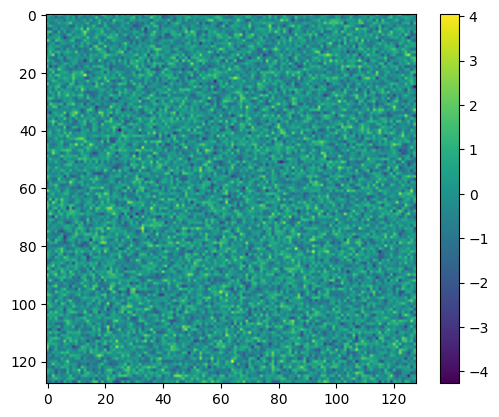

In [2]:
N = 128
f = np.random.normal(size = (N, N, N))
plt.imshow(f[:, :, 12])
plt.colorbar()

In [3]:
L = 1.0
kmin = 2.*np.pi/L       
kmax = kmin*N/2
k1d = np.fft.fftfreq(N, d = 1./kmin/N)
kv = np.meshgrid(k1d, k1d, k1d)
# plt.imshow(kv[:][1][1])


In [21]:
alpha = [0, 1, 2, 3, 4, 5]
norm = 1./(2*np.pi)**(-1.5)
kmod = np.sqrt(kv[0]**2 + kv[1]**2+ kv[2]**2)
fkt = np.random.normal(size = (N,N,N)) + 1j*np.random.normal(size = (N,N,N))   
F = []
fk_prime = []
for i in alpha:
    fk = fkt*kmod**(-i/2)
    fk[0,0,0] = 0
    fk_prime.append(fk) 
    F.append(norm*np.real(np.fft.ifftn(fk)))

C:\Users\nassiria61\AppData\Local\Temp\ipykernel_9120\471345372.py:8: RuntimeWarning: divide by zero encountered in power
  fk = fkt*kmod**(-i/2)
C:\Users\nassiria61\AppData\Local\Temp\ipykernel_9120\471345372.py:8: RuntimeWarning: divide by zero encountered in reciprocal
  fk = fkt*kmod**(-i/2)


Text(0.5, 1.0, '$P(k) = k^{-5}$')

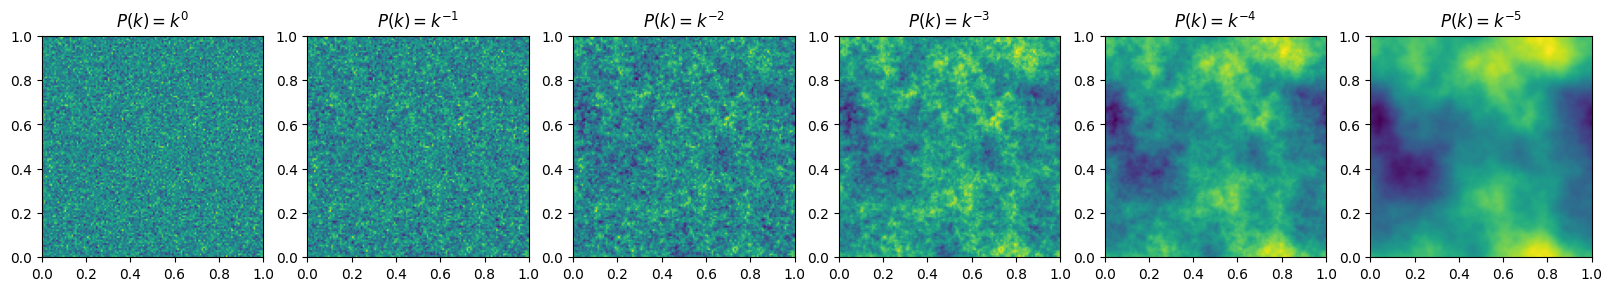

In [5]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize = (20,8))

ax1.imshow(F[0][:,:,32], extent = [0,L,0,L]) 
ax1.set_title('$P(k) = k^{0}$')
ax2.imshow(F[1][:,:,32], extent = [0,L,0,L])
ax2.set_title('$P(k) = k^{-1}$')
ax3.imshow(F[2][:,:,32], extent = [0,L,0,L])
ax3.set_title('$P(k) = k^{-2}$')
ax4.imshow(F[3][:,:,32], extent = [0,L,0,L])
ax4.set_title('$P(k) = k^{-3}$')
ax5.imshow(F[4][:,:,32], extent = [0,L,0,L])
ax5.set_title('$P(k) = k^{-4}$')
ax6.imshow(F[5][:,:,32], extent = [0,L,0,L])
ax6.set_title('$P(k) = k^{-5}$')
# plt.colorbar()

we notice that the fluctuation correlation increases as alpha increases starting from white noise at alpha = 0. 

b)

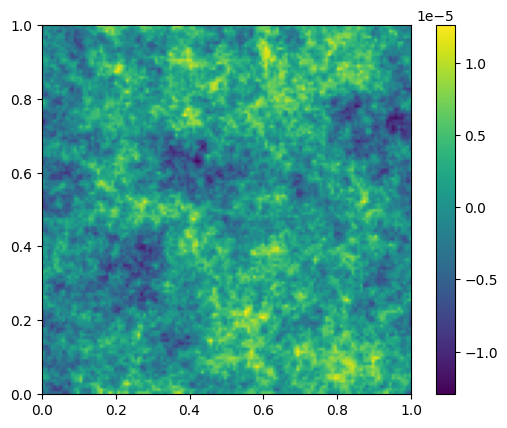

In [6]:
plt.imshow(F[3][:, :,23], extent = [0,L,0,L])
plt.colorbar()

In [7]:
# getting the gradient field for alpha = 3
fd1 = np.zeros([N,N,N,3], dtype = complex)
for i in range(3):
    fd1[..., i] = fk_prime[3]*1j*kv[i]/kmod
    fd1[0,0,0,i] = 0

D1 = np.real(np.fft.ifftn(fd1, axes = [0,1,2]))

C:\Users\nassiria61\AppData\Local\Temp\ipykernel_9120\764656928.py:4: RuntimeWarning: invalid value encountered in divide
  fd1[..., i] = fk_prime[3]*1j*kv[i]/kmod


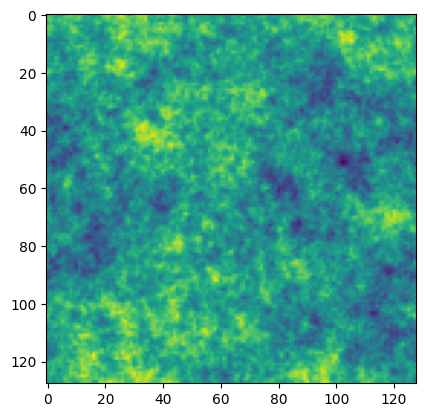

In [8]:
plt.imshow(D1[:, :, 23,2])

In [9]:
np.where(D1>1)

(array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64))

In [10]:
# the Hessian Field
fd2 = np.zeros([N,N,N,3,3], dtype = complex)
for i in range(3):
    for j in range(3):
        fd2[...,i, j] = fk_prime[3]*kv[i]*kv[j]/kmod**2
        fd2[0, 0, 0, i,j] = 0
D2 = np.real(np.fft.ifftn(fd2, axes = [0,1,2]))

C:\Users\nassiria61\AppData\Local\Temp\ipykernel_9120\3188079770.py:5: RuntimeWarning: invalid value encountered in divide
  fd2[...,i, j] = fk_prime[3]*kv[i]*kv[j]/kmod**2


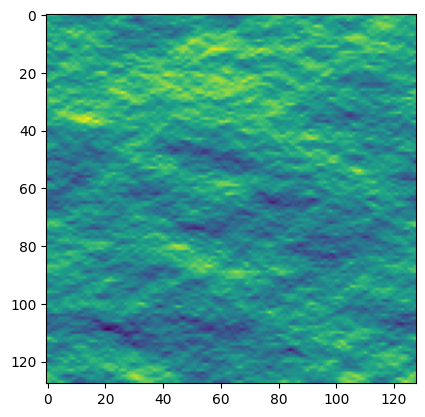

In [11]:
plt.imshow(D2[:,:,1, 1, 1])

In [12]:
def DiagoField(F):
    L = np.linalg.eigvals(F)
    X = np.zeros([N, N,N,3,3])
    for i in range(len(F)):
        for j in range(len(F[i])):
            for k in range(len(F[i][j])):
                X[i][j][k] = np.diag(L[i][j][k])
    return X, L

In [13]:
D, L = DiagoField(D2)

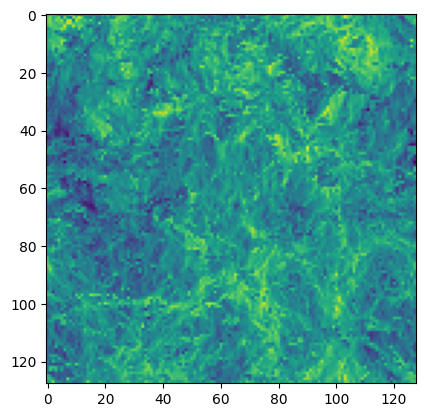

In [14]:
plt.imshow(D[:, :, 32,1,1])


e)

In [24]:
R = 1
N_samples = 100
Sigma_2 = 1/(2*(np.pi**2)*(7  + alpha[3])*R**(7 + alpha[3]))
Sigma_1 = 1/(2*(np.pi**2)*(5  + alpha[3])*R**(5 + alpha[3]))

sigma_t = np.sqrt((Sigma_2**2)/15)
Ls =  Sigma_2/np.sqrt(5) * np.array([[1,1/3,1/3], \
    [0, np.sqrt(8)/3,1/np.sqrt(18)], \
    [0, 0, np.sqrt(5/6)]])
t = np.random.normal(0, sigma_t, size = (N_samples, 3))
s = np.random.normal(0, 1, size = (N_samples, 3)) @ Ls
H = np.zeros((N_samples, 3,3))
H[:, 0, 0] = s[:, 0]
H[:, 1, 1] = s[:, 1]
H[:, 2, 2] = s[:, 2]
H[:, 0, 1] = t[:, 0]
H[:, 1, 0] = t[:, 0]
H[:, 0, 2] = t[:, 1] 
H[:, 2, 0] = t[:, 1]
H[:, 2, 1] = t[:, 2]
H[:, 1, 2] = t[:, 2]

h = np.abs(np.linalg.det(H))

exp_ncrit = np.sqrt(27)/((2*np.pi)**1.5*Sigma_1**3)*np.mean(h)

(array([200.98203736, 278.28282096, 200.98203736, 185.52188064,
        123.68125376, 108.22109704,  38.6503918 ,  23.19023508,
          7.73007836,   7.73007836]),
 array([4.96033189e-05, 9.00687495e-04, 1.75177167e-03, 2.60285585e-03,
        3.45394002e-03, 4.30502420e-03, 5.15610837e-03, 6.00719255e-03,
        6.85827672e-03, 7.70936090e-03, 8.56044507e-03]),
 <BarContainer object of 10 artists>)

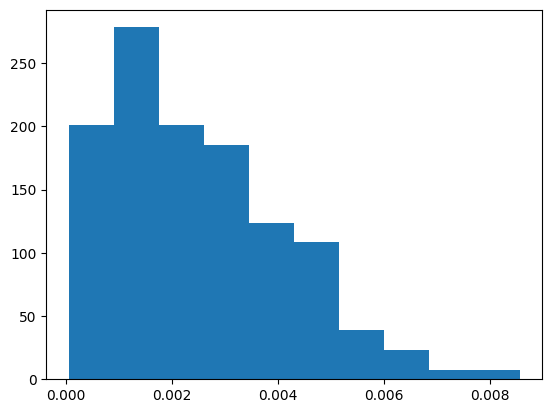

In [45]:
# P = np.linalg.eigvalsh(H)
plt.hist(P[np.where(P>=0)].flatten(), density = True, bins = 10)


In [53]:
# plt.hist(L[np.where(L>=0)].flatten(), bins = 100, density = True )
# a = np.random.normal(size = (3,3))
sum(a[ 1,:])

-2.2424620350616715

In [18]:
L[1,1,1]    

array([-1.10938526e-07, -3.08630647e-08,  2.82146711e-08])